In [1]:
import os
import glob
import itertools
from random import randint
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
# import seaborn
# plt.style.use('seaborn-white')
from pathlib import Path


import matplotlib.cm as cm
from IPython.display import Image
import git

In [2]:

from rmgpy.molecule import Molecule
from rmgpy.data.base import Database

 ### Save the species pictures for a model (renaming with species names instead of smiles

In [3]:
# get the current git repo
import git
repo = git.Repo('/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis/')
# repo.git.checkout('master')
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:20].replace(" ", "_").replace("'", "_")
commit_folder = git_sha + "_" + git_msg
print(commit_folder)

# save the pictures for molecules in the RMG run
overwrite = False
commit = commit_folder
dictionary_filename = "/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis/base/chemkin/species_dictionary.txt"
specs = Database().get_species(dictionary_filename, resonance=False)

images_dir = os.path.join(f"/work/westgroup/ChrisB/meOH-synthesis_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/{commit}/species_pictures")
os.makedirs(images_dir, exist_ok=True)
for name, species in specs.items():
    filepath = os.path.join(images_dir, name + ".png")
    if not overwrite and os.path.exists(filepath):
        continue
    species.molecule[0].draw(filepath)

199260_fixed_typo_in_Cu111_


### Convert dot files to prettydot (dot with molecule structure)

In [4]:
def prettydot(commit_path, dotfilepath, strip_line_labels=False):
    """
    Make a prettier version of the dot file (flux diagram)

    Assumes the species pictures are stored in a directory
    called 'species_pictures' alongside the dot file.
    """
    import os, sys, re
    import subprocess
    import git
    
#     use git to get picture directory
#     repo = git.Repo('/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis/')
#     git_sha = str(repo.head.commit)[0:6]
#     git_msg = str(repo.head.commit.message)[0:20].replace(" ", "_").replace("'", "_")
#     commit_folder = git_sha + "_" + git_msg
    
    
    
    pic_dir = f"{commit_path}/species_pictures/"

    pictures_directory = pic_dir

    if strip_line_labels:
        print("stripping edge (line) labels")

    reSize = re.compile('size="5,6"\;page="5,6"')
    reNode = re.compile(
        '(?P<node>s\d+)\ \[\ fontname="Helvetica",\ label="(?P<label>[^"]*)"\]\;'
    )

    rePicture = re.compile("(?P<smiles>.+?)\((?P<id>\d+)\)\.png")
    reLabel = re.compile("(?P<name>.+?)\((?P<id>\d+)\)$")

    species_pictures = dict()
    for picturefile in os.listdir(pictures_directory):
        match = rePicture.match(picturefile)
        if match:
            species_pictures[match.group("id")] = picturefile
        else:
            pass
            # print(picturefile, "didn't look like a picture")

    filepath = dotfilepath

    if not open(filepath).readline().startswith("digraph"):
        raise ValueError("{0} - not a digraph".format(filepath))

    infile = open(filepath)
    prettypath = filepath.replace(".dot", "", 1) + "-pretty.dot"
    outfile = open(prettypath, "w")

    for line in infile:
        (line, changed_size) = reSize.subn('size="12,12";page="12,12"', line)
        match = reNode.search(line)
        if match:
            label = match.group("label")
            idmatch = reLabel.match(label)
            if idmatch:
                idnumber = idmatch.group("id")
                if idnumber in species_pictures:
                    line = (
                        f'%s [ image="{pic_dir}%s" label="" width="0.5" height="0.5" imagescale=false fixedsize=false color="none" ];\n'
                        % (match.group("node"), species_pictures[idnumber])
                    )

        # rankdir="LR" to make graph go left>right instead of top>bottom

        if strip_line_labels:
            line = re.sub('label\s*=\s*"\s*[\d.]+"', 'label=""', line)

        # change colours
        line = re.sub('color="0.7,\ (.*?),\ 0.9"', r'color="1.0, \1, 0.7*\1"', line)

        outfile.write(line)

    outfile.close()
    infile.close()
    print(f"Graph saved to: {prettypath}")
    os.system(f'dot {prettypath} -Tpng -o{prettypath+".png"} -Gdpi=200')
    
    return prettypath


# read in each filename into dictionary. 
for path in Path('../').rglob('*.dot'):
    path_str = str(path)
    start_index = path_str.find(f'../RMG_wDeut/{commit_folder}')
    
    if start_index != -1:
        commit = path_str[(start_index+13):(start_index+40)]
        path = path_str
        print(path)
        print(commit)
        prettydot(commit,path, strip_line_labels=False)
        
        

# path = '/work/westgroup/ChrisB/meOH-synthesis_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/1054d4_including_David_s_vd/IdealGasConstPressureReactor/400/flux_diagrams/0_5/0_1/reaction_path_C_surface1_beginning.dot'
# prettydot(path, strip_line_labels=False)

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_1/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_1/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_1/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_1/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_1/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_1/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_3/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_3/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_3/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_3/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_4/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_4/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_6/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_6/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_6/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_6/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_6/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_6/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_9/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_9/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_9/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_9/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_9/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_5/0_9/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_3/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_3/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_3/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_3/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_3/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_3/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_5/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_5/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_6/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_6/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_6/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_6/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_8/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_8/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_8/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_8/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_9/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0_9/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_7/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_3/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_3/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_3/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_3/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_3/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_3/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_6/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_6/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_6/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_6/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_6/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_6/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diag

Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_9/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_9/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_9/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_9/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_9/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_8/0_9/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/40

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_3/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_3/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_3/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_3/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_3/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_3/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_5/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_5/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_5/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_5/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_6/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_6/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_8/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_8/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_8/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_8/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_8/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diagrams/0_9/0_8/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/400/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_2/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_2/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_2/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_2/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_2/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_2/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_5/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_5/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_5/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_5/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_5/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_5/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_7/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_7/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_8/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_8/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_8/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_5/0_8/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_1/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_1/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_1/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_1/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_2/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_2/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_4/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_4/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_4/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_4/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_4/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_4/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_7/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_7/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_7/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_7/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_7/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0_7/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_7/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_1/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_1/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_1/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_1/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_1/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_1/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_3/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_3/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_3/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_3/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_4/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_4/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_6/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_6/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_6/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_6/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_6/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_6/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_9/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_9/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_9/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_9/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_9/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_8/0_9/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_3/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_3/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_3/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_3/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_3/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_3/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_6/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_6/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_6/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_6/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_6/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_6/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_8/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_8/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_8/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_8/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_8/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diagrams/0_9/0_8/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/500/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_2/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_2/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_2/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_2/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_2/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_2/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_5/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_5/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_5/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_5/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_5/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_5/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_7/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_7/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_8/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_8/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_8/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_5/0_8/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_1/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_1/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_1/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_1/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_1/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_1/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_4/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_4/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_4/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_4/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_4/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_4/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_7/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_7/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_7/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_7/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_7/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_7/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_9/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_9/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_9/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_7/0_9/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_1/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_1/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_3/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_3/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_3/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_3/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_3/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_3/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_6/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_6/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_6/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_6/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_6/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_6/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_9/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_9/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_9/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_9/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_9/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_8/0_9/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diag

Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_2/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_2/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_2/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_3/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_3/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_3/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/60

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_5/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_5/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_5/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_5/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_5/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_5/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_8/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_8/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_8/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_8/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_8/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diagrams/0_9/0_8/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/steady_state/600/flux_diag

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_1/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_1/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_1/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_1/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_1/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_1/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_d

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_3/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_3/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_3/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_3/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_3/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_3/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_3/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_4/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_4/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_4/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_4/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_4/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_4/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_5/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_5/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_6/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_6/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_6/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_6/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_6/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_7/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_7/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_7/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_7/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_7/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_7/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_8/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_8/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_8/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_8/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_8/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_8/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_5/0_8/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_1/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_1/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_1/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_1/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_1/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_1/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_2/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_2/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_2/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_2/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_2/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_2/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_2/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_4/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_4/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_4/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_4/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_4/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_4/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_5/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_5/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_5/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_5/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_5/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_5/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_5/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_6/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_6/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_6/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_6/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_6/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_6/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_d

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_8/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_8/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_8/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_8/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_8/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_8/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_8/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_9/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_9/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_9/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_9/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_9/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_7/0_9/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_2/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_2/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_3/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_3/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_3/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_3/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_3/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_4/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_4/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_4/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_4/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_4/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_4/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_5/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_5/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_5/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_5/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_5/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_5/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_5/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_7/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_7/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_7/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_7/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_7/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_7/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_8/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_8/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_8/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_8/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_8/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_8/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_8/0_8/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_1/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_1/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_1/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_1/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_1/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_1/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_2/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_2/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_2/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_2/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_2/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_2/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_2/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_3/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_3/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_3/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_3/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_3/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_3/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_d

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_5/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_5/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_5/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_5/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_5/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_5/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_5/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_6/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_6/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_6/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_6/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_6/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_6/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_7/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_7/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_8/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_8/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_8/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_8/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_8/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_9/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_9/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_9/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_9/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_9/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_9/0_9/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_1/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_1/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_1/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_1/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_1/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_1/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_1/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_3/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_3/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_3/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_3/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_3/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_3/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_4/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_4/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_4/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_4/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_4/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_4/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_5/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_5/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_6/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_6/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_6/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_6/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_6/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_7/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_7/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_7/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_7/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_7/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_7/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_7/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_8/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_8/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_8/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_8/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_8/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_8/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_5/0_8/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_1/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_1/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_1/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_1/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_1/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_1/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_2/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_2/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_2/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_2/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_2/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_2/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_2/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_4/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_4/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_4/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_4/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_4/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_4/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_5/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_5/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_5/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_5/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_5/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_5/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_5/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_6/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_6/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_6/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_6/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_6/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_6/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_d

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_8/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_8/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_8/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_8/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_8/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_8/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_9/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_9/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_9/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_9/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_9/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_7/0_9/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_1/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_1/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_1/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_1/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_1/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_1/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_1/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_3/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_3/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_3/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_3/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_3/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_3/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_4/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_4/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_4/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_4/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_4/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_4/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_4/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_5/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_5/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_6/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_6/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_6/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_6/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_6/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_7/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_7/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_7/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_7/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_7/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_7/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_7/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_8/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_8/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_8/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_8/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_8/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_8/0_8/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_d

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_1/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_1/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_1/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_1/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_1/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_1/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_1/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_2/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_2/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_2/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_2/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_2/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_2/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_3/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_3/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_4/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_4/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_4/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_4/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_4/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_5/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_5/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_5/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_5/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_5/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_5/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_6/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_6/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_6/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_6/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_6/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_6/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_6/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_8/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_8/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_8/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_8/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_8/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_8/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_9/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_9/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_9/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_9/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_9/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_9/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/flux_diagrams/0_9/0_9/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_1/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_1/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_2/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_2/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_2/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_2/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_2/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_3/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_3/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_3/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_3/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_3/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_3/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_4/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_4/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_4/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_4/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_4/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_4/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_4/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_6/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_6/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_6/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_6/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_6/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_6/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_6/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_7/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_7/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_7/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_7/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_7/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_7/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_7/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_9/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_9/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_9/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_9/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_9/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_5/0_9/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_1/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_1/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_1/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_1/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_1/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_1/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_1/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_2/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_2/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_2/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_2/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_2/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_2/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_2/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_4/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_4/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_4/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_4/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_4/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_4/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_5/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_5/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_5/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_5/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_5/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_5/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_5/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_7/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_7/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_7/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_7/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_7/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_7/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_8/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_8/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_8/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_8/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_8/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_8/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_8/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_9/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_9/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_9/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_9/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_9/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_7/0_9/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_d

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_2/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_2/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_2/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_2/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_2/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_2/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_3/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_3/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_3/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_3/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_3/reaction_path_N_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_3/reaction_path_N_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_4/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_4/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_4/reaction_path_X_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_4/reaction_path_X_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_4/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_4/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_6/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_6/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_6/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_6/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_6/reaction_path_H_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_6/reaction_path_H_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_7/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_7/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_7/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_7/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_7/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_7/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_8/reaction_path_X_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_8/reaction_path_X_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_9/reaction_path_C_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_9/reaction_path_C_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_9/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_9/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_8/0_9/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_1/reaction_path_H_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_1/reaction_path_H_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_1/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_1/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_1/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_1/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_1/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_2/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_2/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_2/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_2/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_2/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_2/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_d

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_4/reaction_path_C_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_4/reaction_path_C_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_4/reaction_path_C_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_4/reaction_path_C_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_4/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_4/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_5/reaction_path_N_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_5/reaction_path_N_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_5/reaction_path_N_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_5/reaction_path_N_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_5/reaction_path_N_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_5/reaction_path_N_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_6/reaction_path_O_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_6/reaction_path_O_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_6/reaction_path_X_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_6/reaction_path_X_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_6/reaction_path_X_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_6/reaction_path_X_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_6/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_8/reaction_path_C_surface1_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_8/reaction_path_C_surface1_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_8/reaction_path_H_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_8/reaction_path_H_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_8/reaction_path_H_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_8/reaction_path_H_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_8/reacti

../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_9/reaction_path_O_gas_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_9/reaction_path_O_gas_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_9/reaction_path_O_gas_end.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_9/reaction_path_O_gas_end-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_9/reaction_path_O_surface1_beginning.dot
199260_fixed_typo_in_Cu111_
Graph saved to: ../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_9/0_9/reaction_path_O_surface1_beginning-pretty.dot
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/600/flux_diagrams/0_

## Git-python: checkout master branch

In [5]:
import git
repo = git.Repo('/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis/')
# repo.git.checkout('master')
git_sha = str(repo.head.commit)[0:6]
git_msg = str(repo.head.commit.message)[0:20].replace(" ", "_").replace("'", "_")
print(git_sha,': ', git_msg)

current_commit = git_sha+"_"+git_msg

199260 :  fixed_typo_in_Cu111_


## checkout 1 commit back

In [6]:
# repo.git.checkout('HEAD^1')
# sha = str(repo.head.commit)
# msg = str(repo.head.commit.message)
# print(sha,': ', msg)

## checkout 2 commits back

In [7]:
# repo = git.Repo('/work/westgroup/ChrisB/meoh-synthesis_RMG/meOH-synthesis/')
# repo.git.checkout('HEAD^1')
# sha = repo.head.commit
# msg = repo.head.commit.message
# print(sha,': ', msg)

## Read in data

In [6]:
commit_list = []

# read in each filename into dictionary. 
for path in Path('../').rglob('*.csv'):
    path_str = str(path)
    start_index = path_str.find('../RMG_wDeut/')
    
    if start_index != -1:
        commit = path_str[(start_index+13):(start_index+40)]
        if commit not in commit_list:
            commit_list.append(commit)
        
print(commit_list)   
# os.remove("endrxncsv.csv")

['1054d4_including_David_s_vd', '199260_fixed_typo_in_Cu111_', '1ff90d_changed_HCOOH*_and_H', '425811_surface_dissoc_doubl', '4b83f7_decrease_tolerance_f', '4f37c9_rerun_with_fixed_sur', '7487a0_reran_without_any_gr', '8b8e24_disallowed_surface_a', 'a95dd5_added_new_family_sur', 'b12515_model_run_with_RMG-P', 'edbb9c_ran_with_meoh3_branc', 'fb1e00_decreased_tolerance_', 'fcde4b_added_bjarne_s_therm']


In [7]:
# read last line from each CSV file
data_dict = {}

# if true, runs analysis on current commit only
one_commit = True
if one_commit == True:
    commit_list = [current_commit]
    

for commit in commit_list:
    first_file = True
    for path in Path('../RMG_wDeut/' + commit).rglob('*.csv'):
        
        path_str = str(path)
        if "/csp/" not in path_str and "/steady_state/" not in path_str:
            if os.stat(path_str).st_size != 0:
                if first_file == True: 
                    data = pd.read_csv(path_str)
                    aggdata = data.tail(1)
                    first_file = False
                    print('ran')
                else: 
                    data = pd.read_csv(path_str)
                    aggdata = aggdata.append(data.tail(1))
                    print(len(aggdata))
                    print(path)
            
    data_dict.update({commit:aggdata})



ran
2
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_2.csv
3
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_3.csv
4
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_4.csv
5
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_5.csv
6
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_6.csv
7
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_7.csv
8
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/400/results/Spinning_basket

57
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_8_COCO2_0_4.csv
58
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_8_COCO2_0_5.csv
59
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_8_COCO2_0_6.csv
60
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_8_COCO2_0_7.csv
61
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_8_COCO2_0_8.csv
62
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_8_COCO2_0_9.csv
63
../RMG_wDeut/199260_fixed_typo_in_Cu111_/IdealGasReactor/transient/500/results/Spinning_bas

In [25]:
# read last line from each CSV file
data_dict_ss = {}

# if true, runs analysis on current commit only
one_commit = True
if one_commit == True:
    commit_list = [current_commit]
    

for commit in commit_list:
    first_file = True
    for path in Path('../RMG_wDeut/' + commit).rglob('*.csv'):
        
        path_str = str(path)
        if "/csp/" not in path_str and "/steady_state/" in path_str:
            if os.stat(path_str).st_size != 0:
                if first_file == True: 
                    data = pd.read_csv(path_str)
                    aggdata = data.tail(1)
                    first_file = False
                    print('ran')
                else: 
                    data = pd.read_csv(path_str)
                    aggdata = aggdata.append(data.tail(1))
                    print(len(aggdata))
                    print(path)
            
    data_dict_ss.update({commit:aggdata})

ran
2
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_2.csv
3
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_3.csv
4
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_4.csv
5
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_5.csv
6
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_6.csv
7
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/400/results/Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_7.csv
8
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/400/re

64
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_9_COCO2_0_2.csv
65
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_9_COCO2_0_3.csv
66
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_9_COCO2_0_4.csv
67
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_9_COCO2_0_5.csv
68
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_9_COCO2_0_6.csv
69
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/500/results/Spinning_basket_area_0.0231_energy_off_temp_500_h2_0_9_COCO2_0_7.csv
70
../RMG_wDeut/4b83f7_decrease_tolerance_f/IdealGasReactor/steady_state/500

## Turn over frequency comparison

The mechanisms listed below are the pathways that are of interest in TOF.



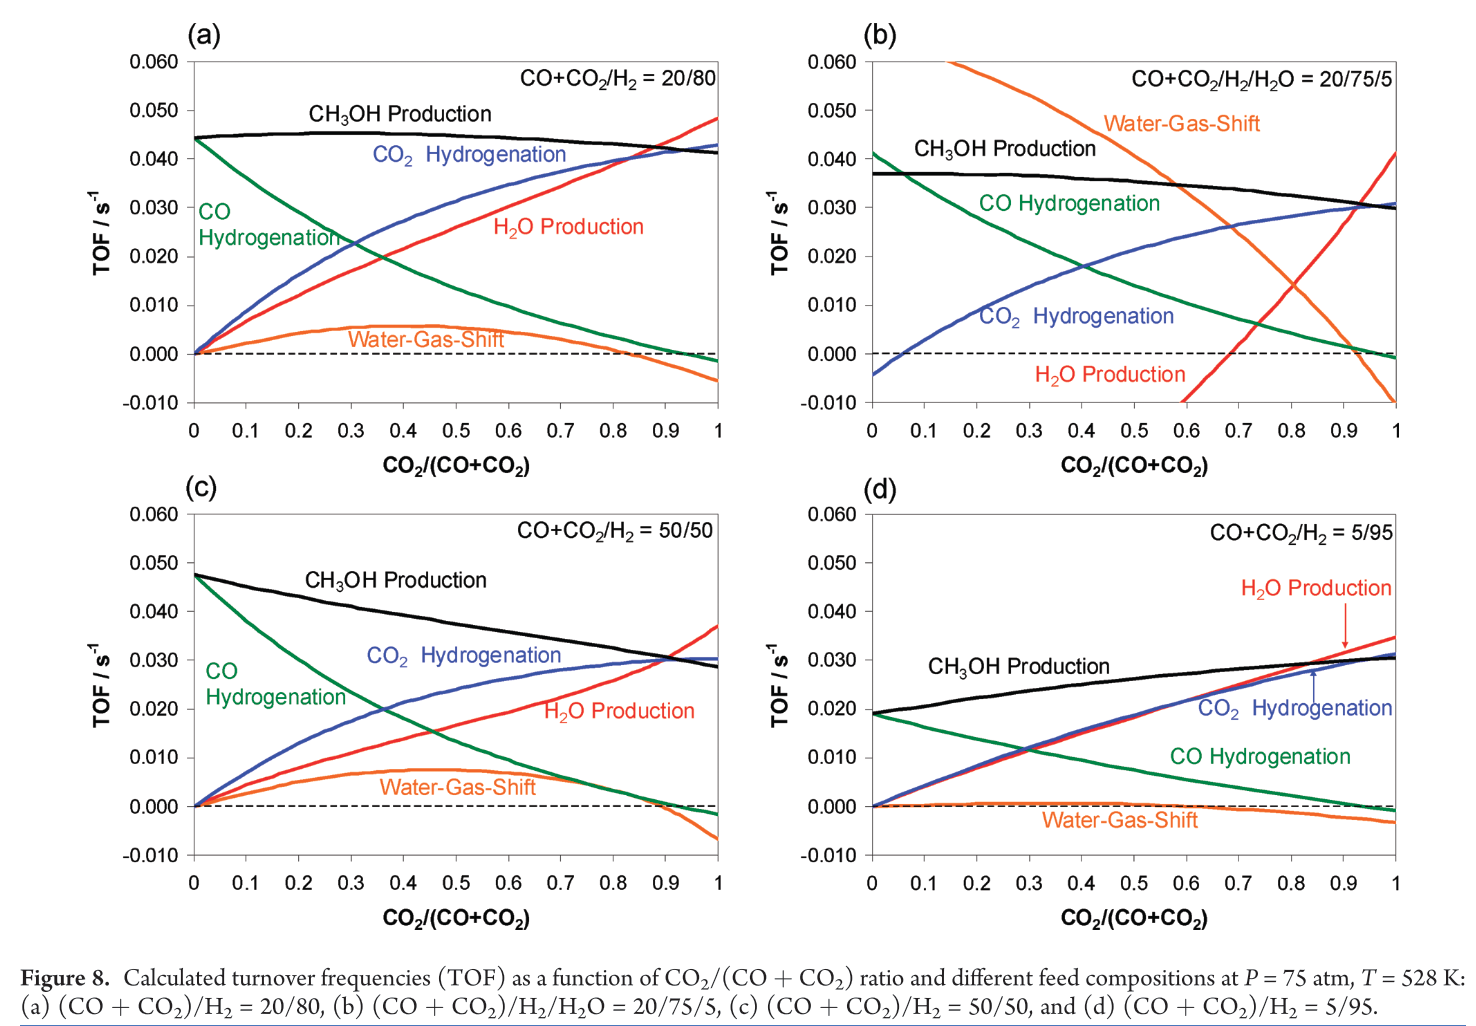

In [8]:
Image('../images/Grabow_plots/Grabow_TOF.png',width = 700, height = 300)

[0.5  0.75 0.8  0.95]


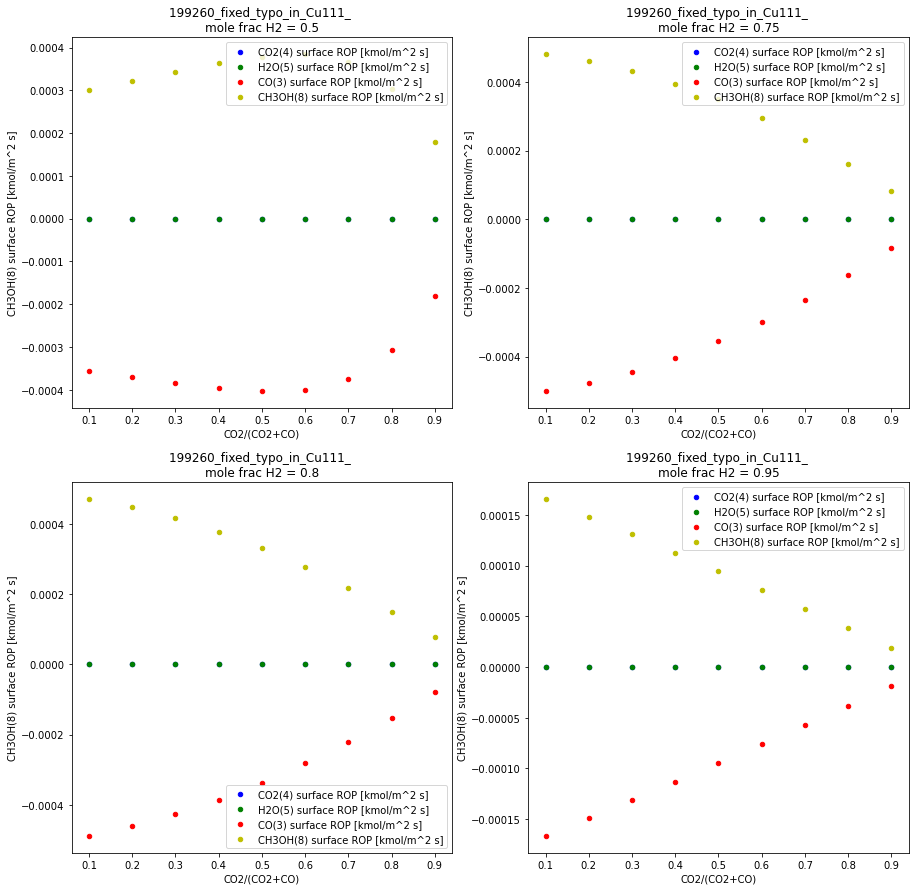

In [8]:
# compare the rate of production for CO2,  H2O, CO, and CH3OH

for commit in commit_list:
# commit = '1054d4_including_David_s_vd'  

    conditions = ['CO2(4) surface ROP [kmol/m^2 s]', 'H2O(5) surface ROP [kmol/m^2 s]', \
                 'CO(3) surface ROP [kmol/m^2 s]', 'CH3OH(8) surface ROP [kmol/m^2 s]']

    temp = 500

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()
    print(H2_ratio)

    fig, ax = plt.subplots(2,2,figsize=(15,15))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[0,0].autoscale(enable=True, axis='y')
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c])
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')
            



In [34]:
df_short[df_short.columns[0]]

9999    400
9999    400
9999    400
9999    400
9999    400
       ... 
9999    600
9999    600
9999    600
9999    600
9999    600
Name: T (C), Length: 107, dtype: int64

In [9]:
# get the maximum values for the 

max_dist = 2
imp_species = []

df_short = data_dict[commit_list[0]]

thresh = 1e-5

print(f'\nSpecies that have a concentration that goes above :{thresh}', '\n')
for i in range (13, len(df_short.columns)):
    
    column = df_short[df_short.columns[i]]
    max_value = column.max()
    max_index = column.idxmax()
    
    if max_value >= thresh and (("X" in df_short.columns[i]) or \
                              ("Pt" in df_short.columns[i]) or \
                              ("Pd" in df_short.columns[i]) or \
                              ("*" in df_short.columns[i])) \
    and not "ROP" in df_short.columns[i] \
    and not "sensitivity" in df_short.columns[i]:
            
        imp_species.append(df_short.columns[i])
        print(df_short.columns[i], "Max = " "{:.10f}".format(max_value))



Species that have a concentration that goes above :1e-05 

X(1) Max = 0.3796017764
H*(10) Max = 0.0215866248
CO*(14) Max = 0.9914534605
CO2*(15) Max = 0.0000524982
HCO*(16) Max = 0.0079512467
CH2O*(20) Max = 0.0006878005
CH3OH*(23) Max = 0.0219685579
H2X(51) Max = 0.7475130104


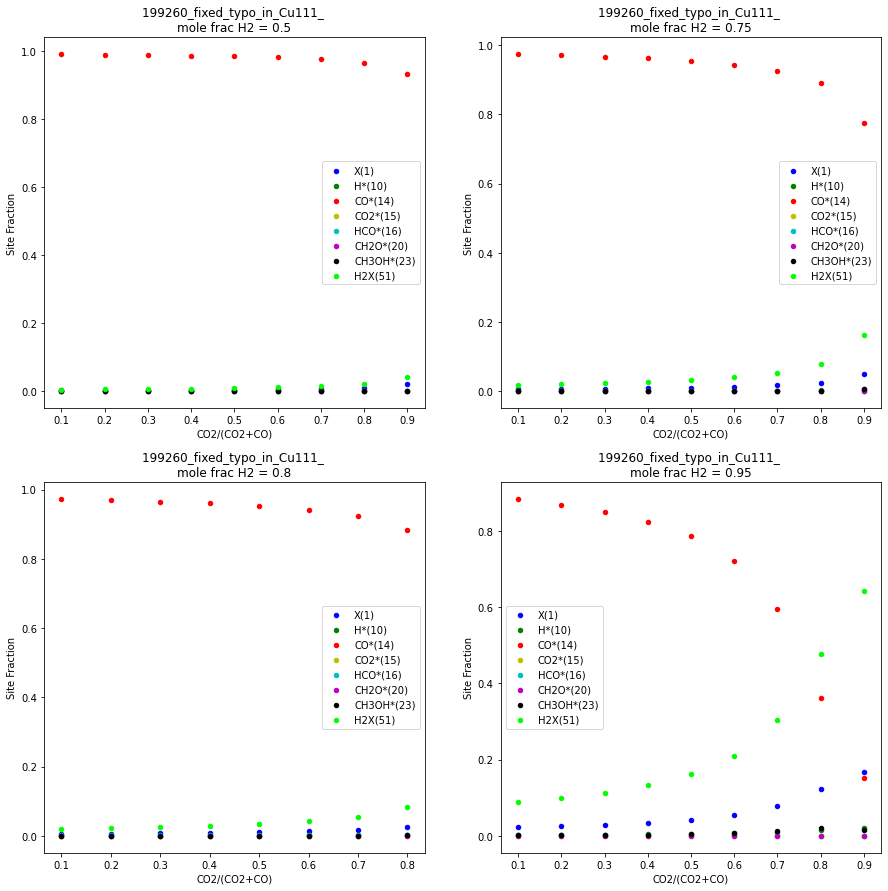

In [10]:
# compare the rate of production for CO2,  H2O, CO, and CH3OH


# for commit in commit_list:
commit = commit_list[0] 

conditions = imp_species
temp = 400

# get keys for H2 (X_h2 initial)
H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()

fig, ax = plt.subplots(2,2,figsize=(15,15))

color_dict = { 0:"b", 1:"g", 2:"r", 3:"y", 4:"c", 5:"m", 6: "k", 7: "lime" , 8:"brown"}
for p,j in enumerate(H2_ratio):
    if p == 0:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
            ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[0,0].set_ylabel("Site Fraction")
    if p == 1:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
            ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[0,1].set_ylabel("Site Fraction")
    if p == 2:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c],)
            ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[1,0].set_ylabel("Site Fraction")
    if p == 3:
        for c,i in enumerate(conditions):
            data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
            ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')
            ax[1,1].set_ylabel("Site Fraction")

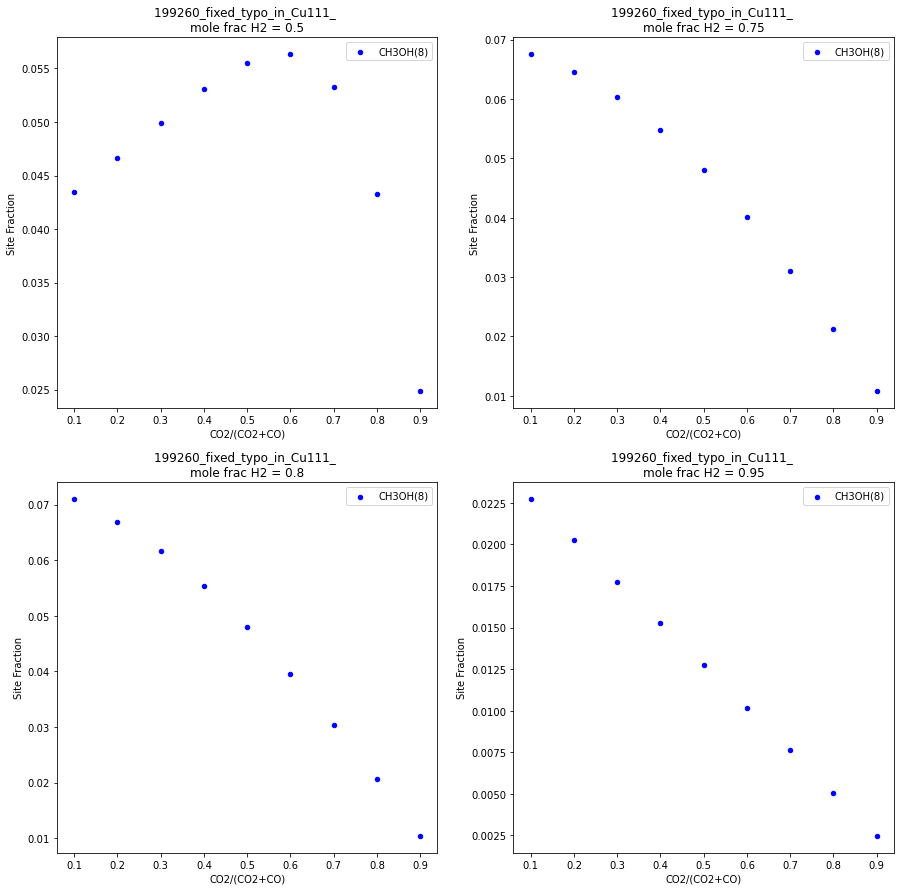

In [11]:
for commit in commit_list:
# commit = 'a95dd5_added_new_family_sur'  

    conditions = ["CH3OH(8)"]

    temp = 500

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()

    fig, ax = plt.subplots(2,2,figsize=(15,15))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y", 4:"c", 5:"m"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[0,0].set_ylabel("Site Fraction")
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[0,1].set_ylabel("Site Fraction")
        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c],)
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[1,0].set_ylabel("Site Fraction")
        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')
                ax[1,1].set_ylabel("Site Fraction")

## Surface coverage comparison


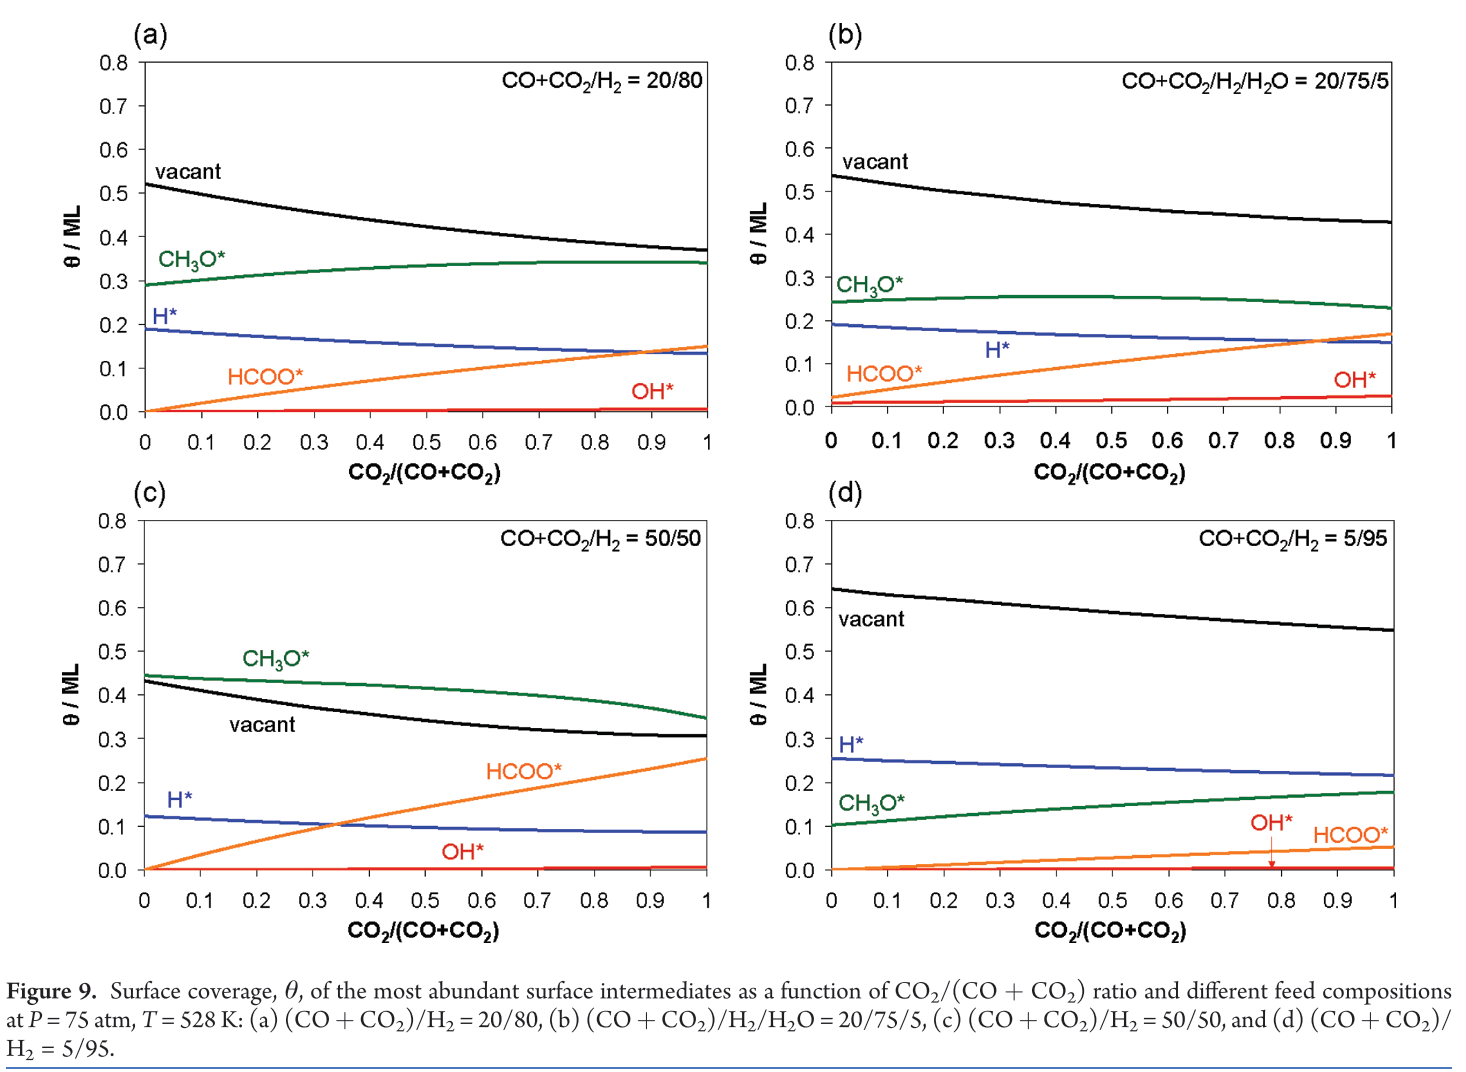

In [18]:
Image('../images/Grabow_plots/Grabow_coverage.png',width = 700, height = 300)

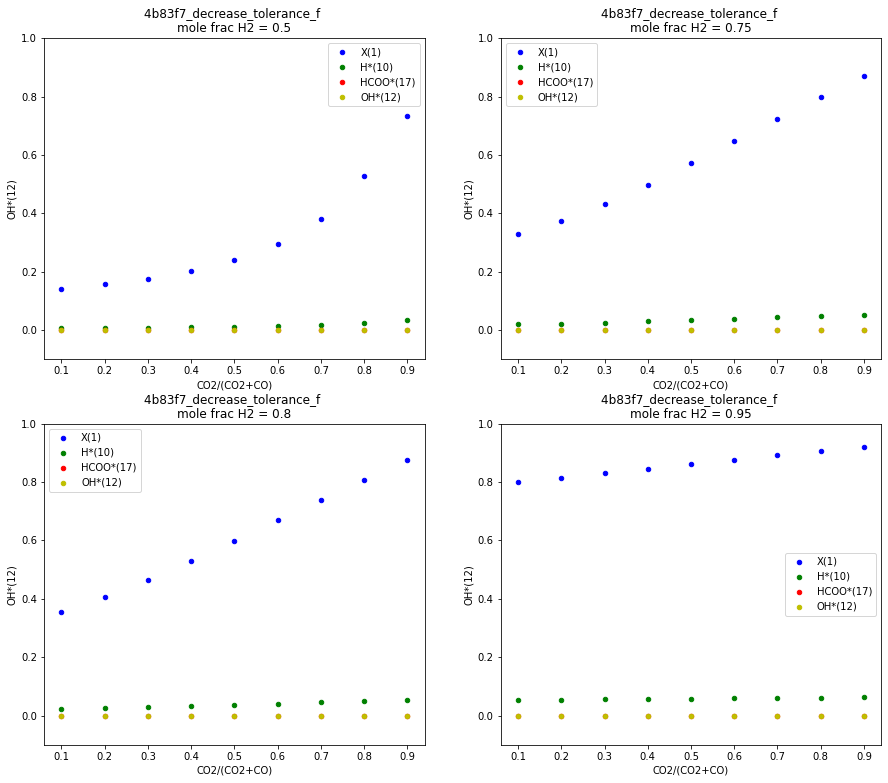

In [43]:
for commit in commit_list:  

    # removing HCOO because we ar using the wrong species
    #     conditions = ['X(1)', 'H*(10)', 'CH3O*(20)', 'HCOO*(17)', 'OH*(12)']
    conditions = ['X(1)', 'H*(10)', 'HCOO*(17)', 'OH*(12)']
    
    temp = 500

    # get keys for H2 (X_h2 initial)
    H2_ratio = data_dict[commit_list[0]]['X_h2 initial'].unique()

    fig, ax = plt.subplots(2,2,figsize=(15,13))

    color_dict = { 0:"b", 1:"g", 2:"r", 3:"y", 4: "k"}
    for p,j in enumerate(H2_ratio):
        if p == 0:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,0], color=color_dict[c], ylim=[-0.1,1.0])
                ax[0,0].set_title(f'{commit} \nmole frac H2 = {j}')
        if p == 1:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[0,1], color=color_dict[c], ylim=[-0.1,1.0])
                ax[0,1].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 2:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,0], color=color_dict[c],ylim=[-0.1,1.0])
                ax[1,0].set_title(f'{commit} \nmole frac H2 = {j}')

        if p == 3:
            for c,i in enumerate(conditions):
                data_dict[commit][(data_dict[commit]['X_h2 initial'] == j) & (data_dict[commit]['T (C)'] == temp \
                    )].plot.scatter(x='CO2/(CO2+CO)', y=i, label=i, ax =ax[1,1], color=color_dict[c], ylim=[-0.1,1.0])
                ax[1,1].set_title(f'{commit} \nmole frac H2 = {j}')

## flux diagrams

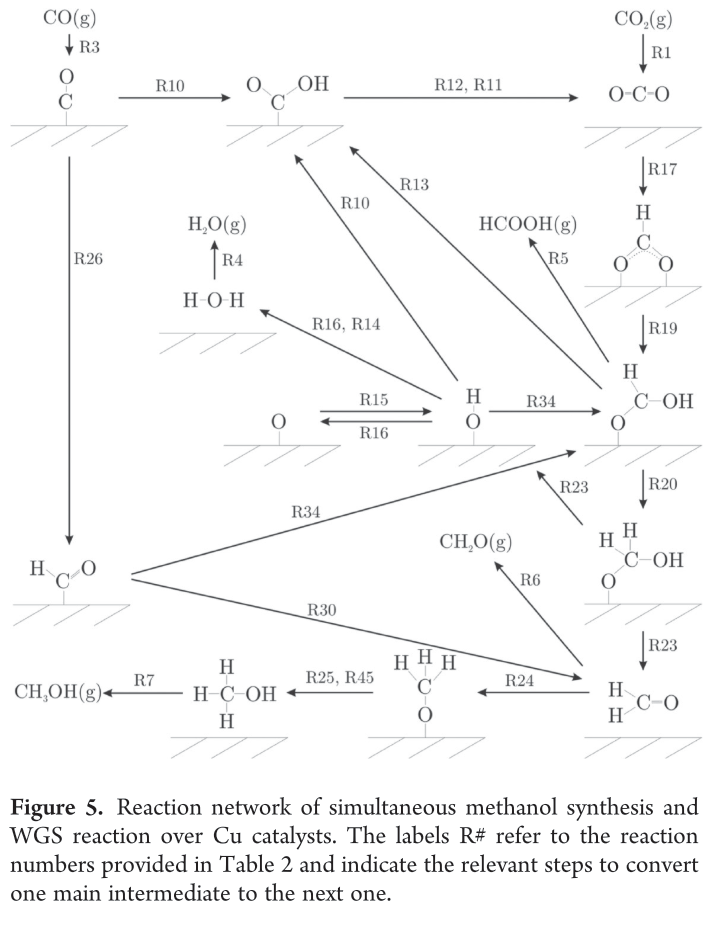

In [20]:
Image('../images/Grabow_plots/Grabow_rxn_path.png',width = 500, height = 300)

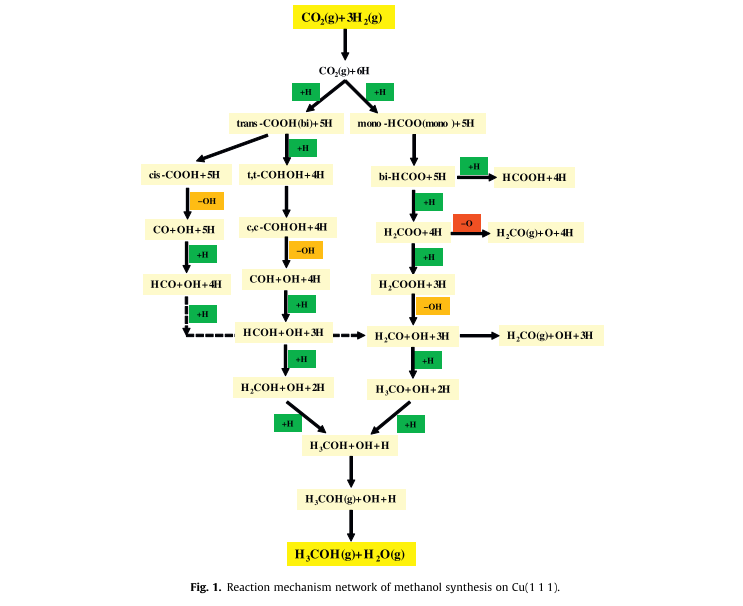

In [21]:
Image('../images/Reaction_mechanism_alternative.png',width = 700, height = 300)

description of commits: 


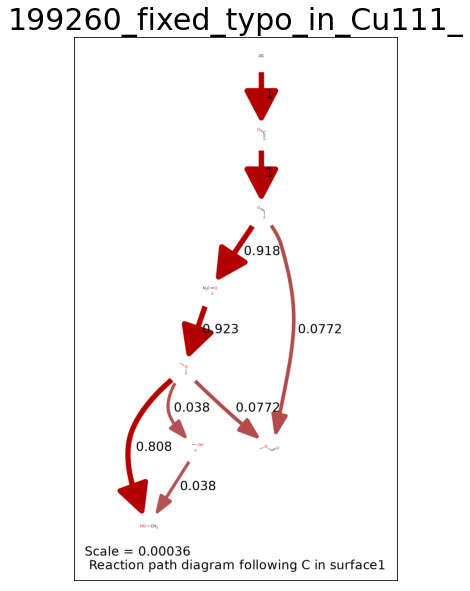

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import math

%matplotlib inline
img = []
flux_path = []

# determine # of rows and columns for displays
placeholder = [1,2,3,4,5]



if one_commit == False:
    rcParams['figure.figsize'] = 40 ,40
    if len(commit_list)%2 == 0:
        rows = int(len(commit_list)/2)
    else: 
        rows = int(math.ceil(len(commit_list)/2))

    fig, ax = plt.subplots(rows,2)
    for i,commit in enumerate(commit_list):
        temp = 600 
        H2_frac = "0_5"
        CO_CO2 = "0_9"
        element = "C"
        phase = "surface1" # "surface1" "gas"
        time = "end" # "end" "beginning"
        prefix = '../RMG_wDeut/'
        flux_path.append(f'/IdealGasConstPressureReactor/{temp}/flux_diagrams/{H2_frac}/{CO_CO2}/reaction_path_{element}_{phase}_{time}-pretty.dot.png')


        img.append(mpimg.imread(f'{prefix}{commit}{flux_path[i]}'))

        #determine placement of picture
        if i%2 == 0:
            row = int(i/2)-1
            col = 0
        else:
            row = int(math.ceil(i/2)) - 1
            col = 1

        ax[row,col].imshow(img[i])
        ax[row,col].get_xaxis().set_visible(False) 
        ax[row,col].get_yaxis().set_visible(False) 
        ax[row,col].set_title(f'{commit}', fontsize = 30)
        
else:
    rcParams['figure.figsize'] = 10 ,10
    fig, ax = plt.subplots(1,1)
    for i,commit in enumerate(commit_list):
        temp = 500 
        H2_frac = "0_5"
        CO_CO2 = "0_9"
        element = "C"
        phase = "surface1" # "surface1" "gas"
        time = "end" # "end" "beginning"
        prefix = '../RMG_wDeut/'
        flux_path.append(f'/IdealGasReactor/transient/{temp}/flux_diagrams/{H2_frac}/{CO_CO2}/reaction_path_{element}_{phase}_{time}-pretty.dot.png')


        img.append(mpimg.imread(f'{prefix}{commit}{flux_path[i]}'))

        ax.imshow(img[i])
        ax.get_xaxis().set_visible(False) 
        ax.get_yaxis().set_visible(False) 
        ax.set_title(f'{commit}', fontsize = 30)



In [ ]:
Image('../images/Grabow_plots/Grabow_rxn_path.png',width = 500, height = 300)

### pathway analysis

In [ ]:
Image('../images/Grabow_plots/Grabow_PES.png',width = 1000, height = 300)

### sensitivity

In [ ]:
# load data into big data dictionary
sens_data_dict = {}
temps = [] 
X_h2s = []
X_coco2s = []

for path in Path('../RMG_wDeut/' + commit).rglob('*.csv'):
    path_str = str(path)
    if os.stat(path_str).st_size != 0 and "csp" not in path_str:
        data = pd.read_csv(path_str)
        if len(data['T (C)']) >= 1: 
            temp = float(data['T (C)'].unique())
            X_h2 = float(data['X_h2 initial'].unique())
            X_coco2 = round(float(data['CO2/(CO2+CO)'].unique()),1)

            if temp not in temps: temps.append(temp)
            if X_h2 not in X_h2s: X_h2s.append(X_h2) 

            if X_coco2 not in X_coco2s: X_coco2s.append(X_coco2)

            sens_data_dict.update({(temp,X_h2,X_coco2) : data})

        else:
            print(path_str)
            print("empty data, sim crashed")

        


In [ ]:
print(sens_data_dict.keys())

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 20), dpi=80)

def max_sensitivities(df, number=0):
    # make a dictionary of highest sensitivity (tuple?)
    columns = {}
    for key, value in df.iteritems():
        if "sensitivity" in key:
            max_sens = value.max()
            min_sens = value.min()
            
            if abs(max_sens) >= abs(min_sens):
                extreme_sens = max_sens
            elif abs(max_sens) < abs(min_sens):
                extreme_sens = min_sens
                
                
            columns.update({key:extreme_sens})
#             print(key, max_sens)

    if number !=0:
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True)[:number])
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False)[:number])
    else: 
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True))
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False))
    return columns, columns_rev


# plot the top sensitivities for a dataframe
def plot_sensitivities(df, num = 5, align="center", height=0.2, label = ""):
    
    imp_reactions_pos, imp_reactions_neg = max_sensitivities(df,num)
    imp_reactions = {**imp_reactions_pos, **imp_reactions_neg}

    imp_reactions_df = pd.Series(data = imp_reactions)
    imp_reactions_df.to_csv(f'test_{label}.csv')
    plt.barh(*zip(*imp_reactions.items()),height=height, log=True, align=align,alpha=0.8, label=label)
#     plt.show()

    plt.legend(loc='best')
#     imp_reactions_df.plot(kind='barh')

columns, columns_rev = max_sensitivities(sens_data_dict[400.0, 0.5, 0.9],5)

plot_sensitivities(sens_data_dict[400.0, 0.5, 0.5],10, "center", label="400K")
plot_sensitivities(sens_data_dict[500.0, 0.5, 0.5],10, "edge",label="500K")
plot_sensitivities(sens_data_dict[600.0, 0.5, 0.5],10, "edge", height=-0.2, label="600K")

In [ ]:
y = list(sens_data_dict.keys())
y[1][0]

In [ ]:
def max_sensitivities(df, number=0):
    # make a dictionary of highest sensitivity (tuple?)
    columns = {}
    for key, value in df.iteritems():
        if "thermo sensitivity" in key:
            max_sens = value.max()
            min_sens = value.min()
            
            if abs(max_sens) >= abs(min_sens):
                extreme_sens = max_sens
            elif abs(max_sens) < abs(min_sens):
                extreme_sens = min_sens
                
                
            columns.update({key:extreme_sens})

    if number !=0:
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True)[:number])
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False)[:number])
    else: 
        columns = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=True))
        columns_rev = dict(sorted(columns.items(), key=lambda kv: kv[1], reverse=False))
    return columns, columns_rev


# plot the top sensitivities for a dataframe
def plot_sensitivities(df, num = 5):
    
    imp_reactions_pos, imp_reactions_neg  = max_sensitivities(df,num)
    imp_reactions = {**imp_reactions_pos, **imp_reactions_neg}
    
    plt.barh(*zip(*imp_reactions.items()))



columns, columns_rev = max_sensitivities(sens_data_dict[400.0, 0.5, 0.9],5)

plot_sensitivities(sens_data_dict[400.0, 0.5, 0.9],10)